Ev Fiyatları verilerini Kaggle'dan indirin.

Önceki dersteki modelinizi yeniden uygulayın.

Aynı model tanımını kullanarak OLS, Lasso, Ridge ve ElasticNet regresyonlarını deneyin.

Bu kez, modelleriniz için en iyi hiperparametre değerlerini seçmek için k-fold çapraz doğrulama yapmanız gerekir. 

Hangi model en iyisidir? Açıklayın?

In [360]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.preprocessing import scale

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [361]:
pd.options.display.max_columns = None

house = pd.read_csv("train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [362]:
#önce kategorik değişkenleri dönüştürerek baslayalım.
KitchenQual = {"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
house["KitchenQual"] = house["KitchenQual"].map(KitchenQual)

ExterQual = {"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
house["ExterQual"] = house["ExterQual"].map(ExterQual)

ExterCond = {"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
house["ExterCond"] = house["ExterCond"].map(ExterCond)

HeatingQC = {"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
house["HeatingQC"] = house["HeatingQC"].map(HeatingQC)

FireplaceQu = {"NA":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
house["FireplaceQu"] = house["FireplaceQu"].map(FireplaceQu)

In [363]:
#kategorik değişkenleri get_dummies ile dönüştürelim
get_dummies_house = pd.get_dummies(house,drop_first=True)


In [364]:
# sonra da değişken değerlerini standartlaştıralım.

house_names=get_dummies_house.select_dtypes(include=["float","integer"]).columns
house_scaled_df = scale(get_dummies_house[house_names])
house_scaled_df = pd.DataFrame(house_scaled_df,columns=house_names)
house_scaled_df = house_scaled_df.dropna()

In [420]:
#SlePrice değişkeni ile en cok korelasyonu olan değişkenlere bakalım.
house_corr=house_scaled_df.corr().SalePrice.abs().sort_values(ascending=False).index[0:70]


In [421]:
house_corr=house_scaled_df.corr().SalePrice.abs().sort_values(ascending=False).index[0:70]
df_house = house_scaled_df[house_corr].drop("SalePrice",axis=1)

### 1.OLS

In [394]:
y = house_scaled_df["SalePrice"]
X = df_house
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=465)


In [395]:
from sklearn.decomposition import PCA

# train setinin indirgenmesi
pca = PCA()
X_reduced_train = pca.fit_transform(X_train)
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:20]

array([21.17, 28.28, 34.84, 40.01, 43.76, 47.38, 50.64, 53.63, 56.48,
       59.04, 61.46, 63.5 , 65.43, 67.26, 69.  , 70.63, 72.16, 73.61,
       75.01, 76.33])

In [396]:
lrm = LinearRegression()
pca_model = lrm.fit(X_reduced_train,y_train)
print(pca_model.intercept_)
print(pca_model.coef_[0:5])

0.5044219287171975
[0.23032586 0.07086898 0.12230283 0.09845764 0.05624261]


In [397]:
# test setinin indirgenmesi
pca2 = PCA()
X_reduced_test = pca2.fit_transform(X_test)

In [398]:
y_pred_train = pca_model.predict(X_reduced_train)
y_pred_test = pca_model.predict(X_reduced_test)

#bileşen sayisi secmeden önceki train ve test hatası
print(np.sqrt(mean_squared_error(y_train,y_pred_train)))
print(np.sqrt(mean_squared_error(y_test,y_pred_test)))

0.46406579397963044
0.6621820645670881


In [399]:
from sklearn import model_selection

In [400]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [401]:
## cross validation yöntemiyle model için optimum bileşen sayısını indirgenmiş
                                                       #train seti üzerinden tespit ettik
lrm = LinearRegression()

RMSE = []

for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lrm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

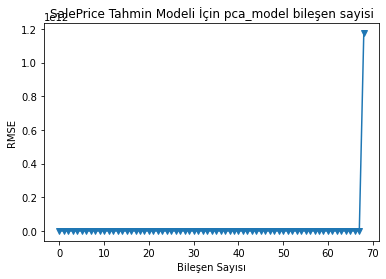

In [402]:
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('SalePrice Tahmin Modeli İçin pca_model bileşen sayisi');

In [403]:
# final model

In [404]:
lrm = LinearRegression()
pca_model = lrm.fit(X_reduced_train[:,0:60],y_train)

y_pred_train = pca_model.predict(X_reduced_train[:,0:60])
y_pred_test = pca_model.predict(X_reduced_test[:,0:60])

print(rmse(y_train,y_pred_train))
print(rmse(y_test,y_pred_test))

print("Eğitim kümesindeki gözlem sayısı  : {}".format(X_reduced_train.shape[0]))
print("Test kümesindeki gözlem sayısı    : {}".format(X_reduced_test.shape[0]), "\n")

print("Eğitim kümesindeki R-Kare değeri  : {}".format(pca_model.score(X_reduced_train[:,0:60], y_train)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(pca_model.score(X_reduced_test[:,0:60], y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_pred_test)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_pred_test)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_pred_test)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100))

0.47833195358104563
0.6543817401469472
Eğitim kümesindeki gözlem sayısı  : 472
Test kümesindeki gözlem sayısı    : 119 

Eğitim kümesindeki R-Kare değeri  : 0.8330707388657304
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : 0.6570639309748707
Ortalama Mutlak Hata (MAE)        : 0.4559472648719478
Ortalama Kare Hata (MSE)          : 0.4282154618377466
Kök Ortalama Kare Hata (RMSE)     : 0.6543817401469472
Ortalama Mutlak Yüzde Hata (MAPE) : 321.65586079223584


### 2.Ridge

In [405]:
y = house_scaled_df["SalePrice"]

X = df_house
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=465)


In [406]:
from sklearn.linear_model import Ridge

In [407]:
ridge_model = Ridge(alpha=10**20)
ridge_model.fit(X_train,y_train)

y_pred_train = ridge_model.predict(X_train)
y_pred_test = ridge_model.predict(X_test)
print(rmse(y_train,y_pred_train))
print(rmse(y_test,y_pred_test))

1.1707472816633806
1.119041949507458


In [408]:
lambdalar = 10**np.linspace(10,-2,1000)*0.5 

from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar, 
                   scoring = "neg_mean_squared_error",
                   normalize = True)

#optimum alpha değerini bulduk
ridge_cv.fit(X_train,y_train)
ridge_cv.alpha_

0.7263269629733892

In [409]:
# simdi de optimum alpha degeri ile modeli tekrar kuralım

ridge_model1 = Ridge(alpha=ridge_cv.alpha_)
ridge_model1.fit(X_train,y_train)

y_pred_train = ridge_model1.predict(X_train)
y_pred_test = ridge_model1.predict(X_test)
print(rmse(y_train,y_pred_train))
print(rmse(y_test,y_pred_test))

print("Eğitim kümesindeki gözlem sayısı  : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı    : {}".format(X_test.shape[0]), "\n")

print("Eğitim kümesindeki R-Kare değeri  : {}".format(ridge_model1.score(X_train, y_train)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(ridge_model1.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_pred_test)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_pred_test)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_pred_test)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100))

0.4643742963340362
0.5833710833796711
Eğitim kümesindeki gözlem sayısı  : 472
Test kümesindeki gözlem sayısı    : 119 

Eğitim kümesindeki R-Kare değeri  : 0.8426705480252985
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : 0.727453495093026
Ortalama Mutlak Hata (MAE)        : 0.40913532018520987
Ortalama Kare Hata (MSE)          : 0.34032182092357116
Kök Ortalama Kare Hata (RMSE)     : 0.5833710833796711
Ortalama Mutlak Yüzde Hata (MAPE) : 316.0197593812844


### 3.Lasso

In [410]:
y = house_scaled_df["SalePrice"]
X = df_house
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=465)

In [411]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=10**20)
lasso_model.fit(X_train,y_train)

y_pred_train = lasso_model.predict(X_train)
y_pred_test = lasso_model.predict(X_test)
print(rmse(y_train,y_pred_train))
print(rmse(y_test,y_pred_test))

1.1707472816633806
1.1190419495074582


In [412]:
#optimum alpha sayisini bulalım
from sklearn.linear_model import LassoCV

lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000, 
                         normalize = True)

In [413]:
lasso_cv_model = LassoCV().fit(X_train,y_train)
lasso_cv_model.alpha_

0.025677261004239022

In [414]:
#optimum alphaya göre modeli tekrar kuralım

lasso_model1 = Lasso(alpha=lasso_cv_model.alpha_)
lasso_model1.fit(X_train,y_train)

y_pred_train = lasso_model1.predict(X_train)
y_pred_test = lasso_model1.predict(X_test)
print(rmse(y_train,y_pred_train))
print(rmse(y_test,y_pred_test))

print("Eğitim kümesindeki gözlem sayısı  : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı    : {}".format(X_test.shape[0]), "\n")

print("Eğitim kümesindeki R-Kare değeri  : {}".format(lasso_model1.score(X_train, y_train)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(lasso_model1.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_pred_test)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_pred_test)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_pred_test)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100))

0.5015184724764593
0.4997755186106565
Eğitim kümesindeki gözlem sayısı  : 472
Test kümesindeki gözlem sayısı    : 119 

Eğitim kümesindeki R-Kare değeri  : 0.8164951479271207
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : 0.7999674009793097
Ortalama Mutlak Hata (MAE)        : 0.33685223600310943
Ortalama Kare Hata (MSE)          : 0.24977556900255068
Kök Ortalama Kare Hata (RMSE)     : 0.4997755186106565
Ortalama Mutlak Yüzde Hata (MAPE) : 248.14231818934545


### 4.ElasticNet

In [415]:
y = house_scaled_df["SalePrice"]

X =df_house

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=465)

In [416]:
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet(alpha=10**21,l1_ratio=0.5)
elastic_model.fit(X_train,y_train)

y_pred_train = elastic_model.predict(X_train)
y_pred_test = elastic_model.predict(X_test)
print(rmse(y_train,y_pred_train))
print(rmse(y_test,y_pred_test))

1.1707472816633806
1.1190419495074582


In [417]:
#optimum alphayı bulalım
from sklearn.linear_model import ElasticNetCV
elastic_cv_model = ElasticNetCV(cv = 10, random_state = 465).fit(X_train, y_train)
elastic_cv_model.alpha_

0.059045220924554616

In [418]:
#optimum alphayı yerine koyarak modeli yeniden kuralım

In [419]:
elastic_model1 = ElasticNet(alpha=elastic_cv_model.alpha_,l1_ratio=0.5)
elastic_model1.fit(X_train,y_train)

y_pred_train = elastic_model1.predict(X_train)
y_pred_test = elastic_model1.predict(X_test)
print(rmse(y_train,y_pred_train))
print(rmse(y_test,y_pred_test))

print("Eğitim kümesindeki gözlem sayısı  : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı    : {}".format(X_test.shape[0]), "\n")

print("Eğitim kümesindeki R-Kare değeri  : {}".format(elastic_model1.score(X_train, y_train)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(elastic_model1.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_pred_test)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_pred_test)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_pred_test)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100))

0.5064266448291139
0.49928784374242235
Eğitim kümesindeki gözlem sayısı  : 472
Test kümesindeki gözlem sayısı    : 119 

Eğitim kümesindeki R-Kare değeri  : 0.8128857864897117
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : 0.8003575892669014
Ortalama Mutlak Hata (MAE)        : 0.33524264341744503
Ortalama Kare Hata (MSE)          : 0.24928835090895757
Kök Ortalama Kare Hata (RMSE)     : 0.49928784374242235
Ortalama Mutlak Yüzde Hata (MAPE) : 256.79321062339517


sonuc:Elasticnet modelinin hata oranları diğerlerine göre daha düşüktür ve train-test seti arasındaki R2 farkları da daha düşüktür.Bu yüzden diğer modellerden daha basarılıdır.